# Least Squares Regression

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt 

In [ ]:
''' 어떤 Parameter를 최소화할 수 있는지 생각 
- 최소화하고 싶은 parameter의 함수를 미분하여 최소가 되는 값을 도출하는 것 
- Regression의 예측값과 실제값의 차이(오차)를 최소화하고자 하는 것 
- 오차의 거리를 측정하는 방법은 다양함 
  - 피타고라스 정의에 따른 유클리드 거리 (제곱)
  - 맨하탄 거리 (절대값)

Error Minimize 
- 방법 
  - Error함수의 미분값을 업데이트하면서 Error를 줄여나가는 것 
'''

' 어떤 Parameter를 최소화할 수 있는지 생각 \n- 최소화하고 싶은 parameter의 함수를 미분하여 최소가 되는 값을 도출하는 것 \n- Regression의 예측값과 실제값의 차이(오차)를 최소화하고자 하는 것 \n- 오차의 거리를 측정하는 방법은 다양함 \n  - 피타고라스 정의에 따른 유클리드 거리 (제곱)\n  - 맨하탄 거리 (절대값)\n\nError Minimize \n- 방법 \n  - Error함수의 미분값을 업데이트하면서 Error를 줄여나가는 것 \n'

# Y = ax + b 문제를 Gradient Descent를 활용하여 풀기

In [ ]:
a = 1 
b = 0.5 
n = 100
xmin, xmax = 1, 10
# 초기 파라미터

In [ ]:
def f(x, a, b):
  return a*x + b

vf = np.vectorize(f)
# vector화해줌 

In [ ]:
xs = np.random.uniform(xmin, xmax, n)
# min, max사이에 n개의 x를 도출 
print('xs : ', xs)

# 랜덤하게 x값 도출 
# ys = [] 
# for x in xs:
#   ys.append(f(x,a,b))
#   # 이것도 가능 

ys = vf(xs, a, b) 
print('ys : ', ys)

xs :  [9.86413239 3.17723192 6.24574467 3.29955299 6.03095895 4.14739788
 4.91822376 2.08434279 2.23991278 1.11973916 8.13286606 5.09095811
 8.92162946 1.60974541 4.36620018 1.94741741 1.63860148 9.42993623
 6.1711591  8.46582958 5.24244213 6.13972942 3.39609226 9.27003882
 2.18288506 2.95428907 6.37417761 8.93021399 2.32353794 9.36039576
 7.73593926 3.31250966 1.80942101 7.26800081 2.74477467 2.54555028
 7.81875687 2.2240805  8.09590894 5.65568803 5.26547207 3.19664455
 4.67706774 3.33279449 3.0095892  2.0457032  2.77705083 7.94068842
 4.73636019 8.72945067 9.75880469 9.91739279 9.56661776 3.20007634
 7.18986329 4.20948768 2.11465365 9.50797027 6.95912606 4.63063254
 8.10385237 5.15403945 7.12937148 7.0024446  5.40482922 5.44678048
 8.06995246 2.71717215 8.72166398 4.05770986 5.42238705 8.47673092
 9.02358467 5.60112591 2.89372479 4.11407257 4.29188537 6.86070196
 1.84636677 6.10588002 5.9282258  1.71847847 4.58157208 8.61592972
 3.27366341 5.40999161 1.22401998 1.58716311 5.87973281 

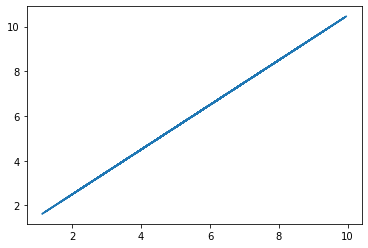

In [ ]:
plt.plot(xs, ys);
# 노이즈가 없음 

In [ ]:
# 노이즈 추가 
ys = vf(xs, a, b) + np.random.normal(0,1,n)
print('ys : ', ys) 

ys :  [ 9.07369835  3.08596818  7.87429043  3.43589095  5.83634654  5.16265366
  5.5696505   1.05789263  2.08070918  3.12754718  8.56445672  6.26486385
 10.55131749  1.65018636  4.61800109  3.1237621   2.72274618 10.92673971
  7.73076772  8.05290192  6.75923772  7.3032082   4.44764853  9.65419037
  2.80072588  6.60833603  7.17444846  8.56117594  3.22309922 11.30776724
  8.36169927  5.09526969  2.45313564  8.32019026  4.10424694  3.05712219
  8.61618913  2.28946633  8.72002518  4.84083925  6.45161688  2.16050544
  4.87766878  3.11372749  2.18886946  0.74222286  5.14893567  8.67980762
  6.51962992  9.45863893 10.33973001 10.62656522  9.42303805  3.60839122
  7.15291602  5.10523867  2.07516056  8.95070563  7.47117659  6.41683332
  7.43673366  6.61178138  9.55851555  8.44831     6.9206675   7.05182496
  8.33178858  3.84760846 10.14612789  3.09053821  5.19460072  7.31971088
  9.54277768  6.32912377  4.27803335  4.45513466  5.45891652  6.74211119
  1.39464824  6.83511688  6.21905784  3.22765

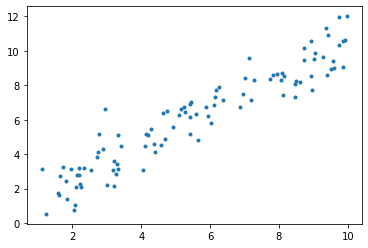

In [ ]:
plt.plot(xs, ys, '.');
# 노이즈 추가 

In [ ]:
import time 

Best_A, Best_B = None, None
Best_loss = 1e9
t0 = time.time()

lossesBysearch = []

for aa in np.arange(-100, 100, 0.1):
  for bb in np.arange(-100, 100, 0.1):
    # 파라미터를 개별로 지정 
    
    yys = f(xs, aa, bb)
    # x값에 랜덤한 기울기와 절편을 넣어서 예측값 도출 
    loss = ((yys - ys)**2).sum()
    lossesBysearch.append(loss)
    if loss < Best_loss:
      Best_A, Best_B = aa, bb
      Best_loss = loss

t = time.time()
print('truth : ', a,b)
print('Predict : ', Best_A, Best_B)
print('time : ', t - t0)
# 랜덤한 a,b를 내가 정한 함수에 넣어서 해당 파라미터를 조정하는 것을 보여줌 

truth :  1 0.5
Predict :  0.9999999999942588 0.5999999999942816
time :  37.7195827960968


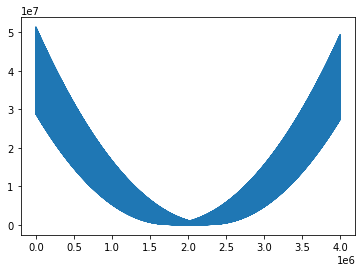

In [ ]:
plt.plot(lossesBysearch)
# 어느순간 한번 미니멈을 찍은 것을 보여줌 

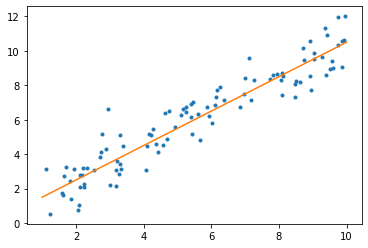

In [ ]:
plt.plot(xs, ys, '.')
plt.plot([xmin, xmax], [f(xmin, a, b), f(xmax, a, b)])

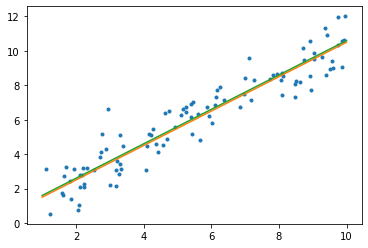

In [ ]:
plt.plot(xs, ys, '.')
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, Best_A, Best_B)
yTrue = f(xxs, a, b)
plt.plot(xxs, yTrue)
plt.plot(xxs, yBest)
# 최대한 유사하게 찾은 것을 볼 수 있음 

# 함수 미분 

In [ ]:
def df_a(x, a, b):
  return x
# a에 대한 미분 
def df_b(x, a, b):
  return 1
# b에 대한 미분 


def gradF(x, a, b):
  return (x, 1)

# Gradient Descent 알고리즘

In [ ]:
t0 = time.time()
fitA, fitB = -100, 100
# 초기값 
eta = 0.0001
# 조정값 
lossgrad = []
a = []
b = []

for i in range(10000):

  yys =  f(xs, fitA, fitB)
  # 전체 데이터를 통해 예측값 도출 

  grad_A, grad_B = gradF(xs, fitA, fitB)
  # a,b의 미분값을 도출 

  fitA = fitA - eta * ((yys - ys) * grad_A).sum()
  # a에 대한 값을 조정해나가는 과정 
  fitB = fitB - eta * ((yys - ys) * grad_B).sum()
  # b에 대한 값을 조정해나가는 과정 

  # 이부분 다시 생각 
  
  loss = ((yys - ys) ** 2).sum()
  lossgrad.append(loss)


t = time.time()
print('truth : ', a,b)
print('fit result : ', fitA, fitB)
print('time : ', t - t0)
# 랜덤한 a,b를 내가 정한 함수에 넣어서 해당 파라미터를 조정하는 것을 보여줌 

truth :  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
xs

array([9.86413239, 3.17723192, 6.24574467, 3.29955299, 6.03095895,
       4.14739788, 4.91822376, 2.08434279, 2.23991278, 1.11973916,
       8.13286606, 5.09095811, 8.92162946, 1.60974541, 4.36620018,
       1.94741741, 1.63860148, 9.42993623, 6.1711591 , 8.46582958,
       5.24244213, 6.13972942, 3.39609226, 9.27003882, 2.18288506,
       2.95428907, 6.37417761, 8.93021399, 2.32353794, 9.36039576,
       7.73593926, 3.31250966, 1.80942101, 7.26800081, 2.74477467,
       2.54555028, 7.81875687, 2.2240805 , 8.09590894, 5.65568803,
       5.26547207, 3.19664455, 4.67706774, 3.33279449, 3.0095892 ,
       2.0457032 , 2.77705083, 7.94068842, 4.73636019, 8.72945067,
       9.75880469, 9.91739279, 9.56661776, 3.20007634, 7.18986329,
       4.20948768, 2.11465365, 9.50797027, 6.95912606, 4.63063254,
       8.10385237, 5.15403945, 7.12937148, 7.0024446 , 5.40482922,
       5.44678048, 8.06995246, 2.71717215, 8.72166398, 4.05770986,
       5.42238705, 8.47673092, 9.02358467, 5.60112591, 2.89372

In [ ]:
a[:5]

[array([9.86413239, 3.17723192, 6.24574467, 3.29955299, 6.03095895,
        4.14739788, 4.91822376, 2.08434279, 2.23991278, 1.11973916,
        8.13286606, 5.09095811, 8.92162946, 1.60974541, 4.36620018,
        1.94741741, 1.63860148, 9.42993623, 6.1711591 , 8.46582958,
        5.24244213, 6.13972942, 3.39609226, 9.27003882, 2.18288506,
        2.95428907, 6.37417761, 8.93021399, 2.32353794, 9.36039576,
        7.73593926, 3.31250966, 1.80942101, 7.26800081, 2.74477467,
        2.54555028, 7.81875687, 2.2240805 , 8.09590894, 5.65568803,
        5.26547207, 3.19664455, 4.67706774, 3.33279449, 3.0095892 ,
        2.0457032 , 2.77705083, 7.94068842, 4.73636019, 8.72945067,
        9.75880469, 9.91739279, 9.56661776, 3.20007634, 7.18986329,
        4.20948768, 2.11465365, 9.50797027, 6.95912606, 4.63063254,
        8.10385237, 5.15403945, 7.12937148, 7.0024446 , 5.40482922,
        5.44678048, 8.06995246, 2.71717215, 8.72166398, 4.05770986,
        5.42238705, 8.47673092, 9.02358467, 5.60

In [ ]:
print(a)
print(b)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



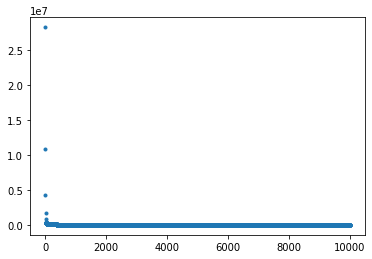

In [ ]:
plt.plot(lossgrad, '.')
# loss가 떨어지는 것을 볼 수 있음 

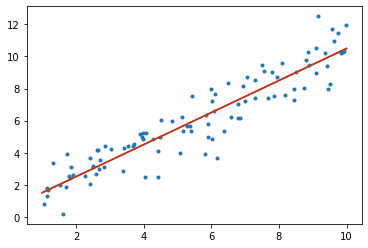

In [ ]:
plt.plot(xs, ys, '.')
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, fitA, fitB)
yScan = f(xxs, Best_A, Best_B)
yTrue = f(xxs, a, b)
plt.plot(xxs, yTrue)
plt.plot(xxs, yBest)
plt.plot(xxs, yScan)
# 최대한 유사하게 찾은 것을 볼 수 있음 

In [ ]:
a = 1.2345
b = 5.4757
c = 91.1324
n = 100
xmin, xmax = -10, 10

In [ ]:
def f(x, a, b, c):
  return a*x*x + b*x + c

vf = np.vectorize(f)

In [ ]:
xs = np.random.uniform(xmin, xmax, n)
ys = f(xs, a, b, c) + np.random.normal(0, 10, n)

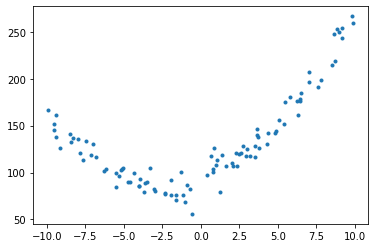

In [ ]:
plt.plot(xs, ys, '.')

In [ ]:
Best_A, Best_B = None, None
Best_loss = 1e9
t0 = time.time()

lossesBysearch = []

for aa in np.arange(-100, 100, 0.1):
  for bb in np.arange(-100, 100, 0.1):
    for cc in np.arange(-100, 100, 0.1):
    # 파라미터를 개별로 지정 
    # 3중 loop이기 때문에 컴퓨팅 시간이 오래걸림 
    
      yys = f(xs, aa, bb, cc)
      # x값에 랜덤한 기울기와 절편을 넣어서 예측값 도출 
      loss = ((yys - ys)**2).sum()
      lossesBysearch.append(loss)
      if loss < Best_loss:
        Best_A, Best_B, Best_C = aa, bb, cc
        Best_loss = loss

t = time.time()
print('truth : ', a,b,c)
print('Predict : ', Best_A, Best_B, Best_C)
print('time : ', t - t0)
# 랜덤한 a,b를 내가 정한 함수에 넣어서 해당 파라미터를 조정하는 것을 보여줌 

KeyboardInterrupt: ignored

In [ ]:
def gradF(x, a, b, c):
  # y = a*x*x + b*x + c
  return (x*x, x, 1)

In [ ]:
t0 = time.time()
fitA, fitB, fitC = -10, -10, -10
# 초기값 
eta = 0.0000001
# 조정값 
lossgrad = []

for i in range(10000):

  yys =  f(xs, fitA, fitB, fitC)
  # 전체 데이터를 통해 예측값 도출 

  grad_A, grad_B, grad_C = gradF(xs, fitA, fitB, fitC)
  # a,b의 미분값을 도출 

  fitA = fitA - eta * ((yys - ys) * grad_A).sum()
  # a에 대한 값을 조정해나가는 과정 
  fitB = fitB - eta * ((yys - ys) * grad_B).sum()
  # b에 대한 값을 조정해나가는 과정 
  fitC = fitC - eta * ((yys - ys) * grad_C).sum()

  # 이부분 다시 생각 
  
  loss = ((yys - ys) ** 2).sum()
  lossgrad.append(loss)

t = time.time()
print('truth : ', a,b)
print('fit result : ', fitA, fitB)
print('time : ', t - t0)
# 랜덤한 a,b를 내가 정한 함수에 넣어서 해당 파라미터를 조정하는 것을 보여줌 

truth :  1.2345 5.4757
fit result :  2.875410290214178 5.219515252762867
time :  0.3041667938232422


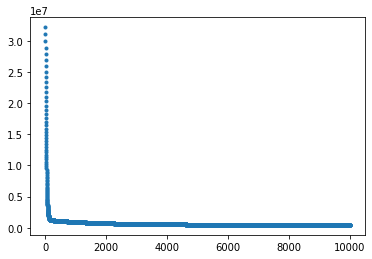

In [ ]:
plt.plot(lossgrad, '.')
# loss가 떨어지는 것을 볼 수 있음 

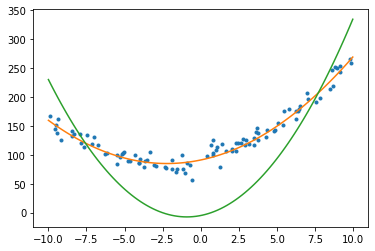

In [ ]:
plt.plot(xs, ys, '.')
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, fitA, fitB, fitC)
yTrue = f(xxs, a, b, c)
plt.plot(xxs, yTrue)
plt.plot(xxs, yBest)
# 최대한 유사하게 찾은 것을 볼 수 있음 

-0.5440211108893698